In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, ARDRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMRegressor
import optuna
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Let's look and download the data

In [111]:
data = pd.read_csv('train.csv', index_col='id')
data_test = pd.read_csv('test.csv', index_col='id')
Artificial_Crystal = pd.read_csv('Artificial_Crystals_Dataset.csv')

In [98]:
data.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [100]:
data_test.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
id,,,,,,,,,,,
10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [99]:
Artificial_Crystal.head()

,Unnamed: 0,Formula,Crystal structure,Hardness (Mohs),allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,MnTeMoO6,tetragonal,4.5,167.0,23.907992,18.555556,5.000000,41.609136,11.693844,2.938889,1.711111,0.884444,0.477830,2.656444
1,1,MgH2,tetragonal,4.0,14.0,1.740168,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.580056
2,2,CO(NH2)2C4H6O5,monoclinic,2.5,102.0,8.511159,4.434783,3.304348,8.440584,13.176622,2.672609,1.379130,0.530870,0.713850,0.370050
3,3,GaPO4,trigonal,5.5,78.0,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555
4,4,Ga3PO7,trigonal,6.5,164.0,19.921324,14.909091,5.090909,32.012361,11.255573,2.881818,1.640909,0.841818,0.483480,1.811029


In [77]:
data.shape, data_test.shape, Artificial_Crystal.shape

((10407, 12), (6939, 11), (52, 15))

In [78]:
#Let's look at the gaps and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [79]:
#statistics of all signs
data.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [80]:
#let's look at duplicates
data.duplicated().sum()

0

**Block description**
- **data, data_test** - basic data for training and testing (11 features, 1 target). All values are discrete numbers, positive values, “Hardness” target values from 0 to 10, no NaN, duplicates, categorical features
- **Artificial_Crystal** - Handbook of Chemistry and Physics and the American Mineralogist Crystal Structure Database

## 2. Let's draw density histograms and Box plot and correlation of features

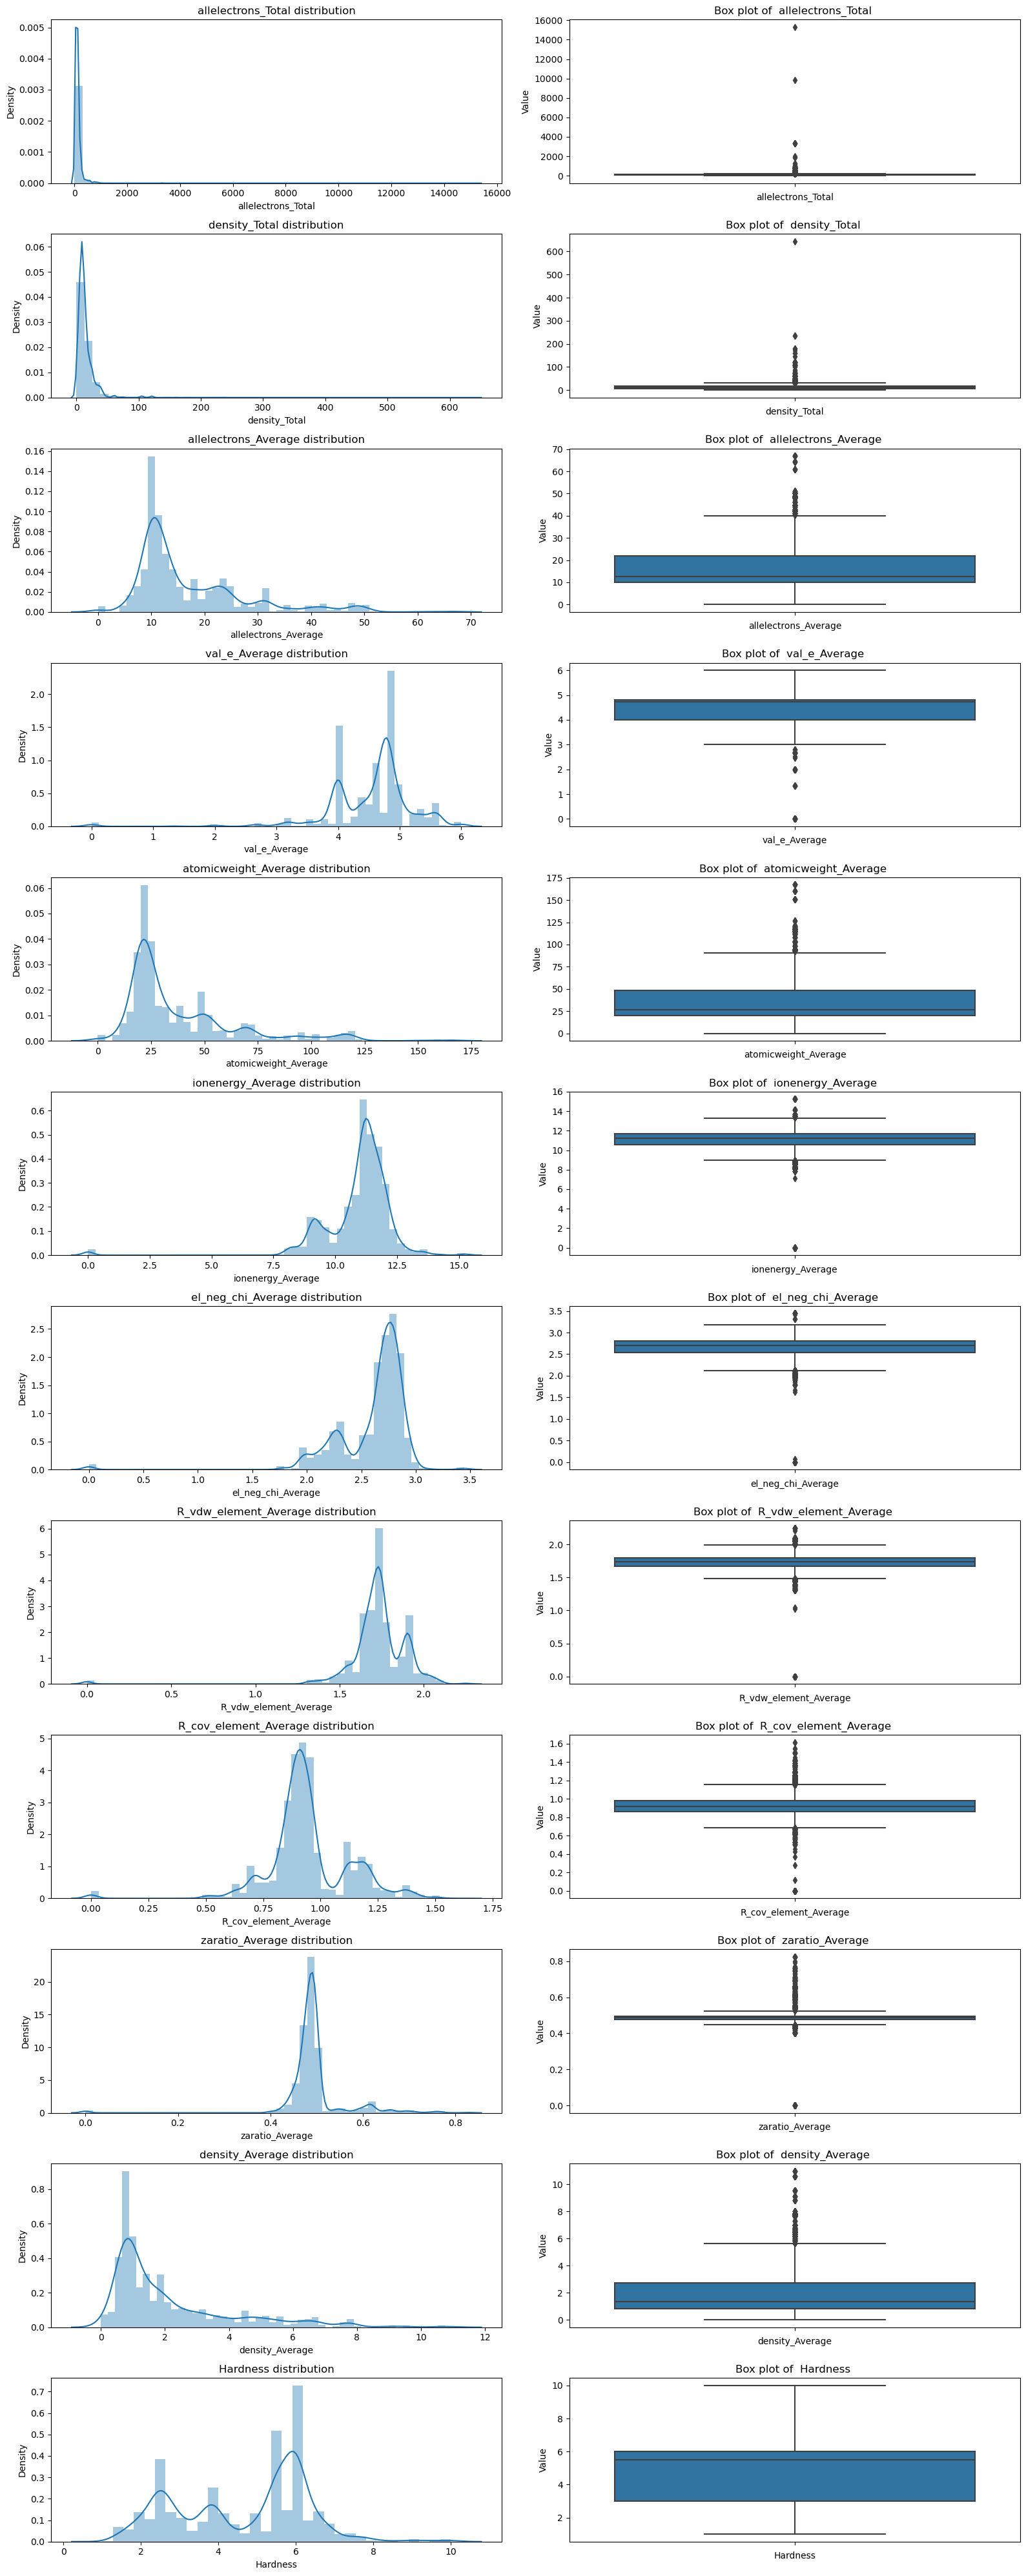

In [13]:
num_col = data.columns
def plot_histograms(num_col, rows, cols):

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16,40))
    for i, column in enumerate(num_col):
        # Histogram 
        ax = axes[i,0]
        sns.distplot(data[column], ax=ax, kde=True)
        
        ax.set_title(f'{column} distribution')
        
        # Box plot
        ax = axes[i,1]
        sns.boxplot(data = data, y=data[column], ax=ax)
        ax.set_title(f'Box plot of  {column} ')
        
        ax.set_xlabel(column)
        ax.set_ylabel('Value')

        
    plt.tight_layout()
    plt.show()
        
plot_histograms(num_col, len(num_col), 2)

<AxesSubplot:>

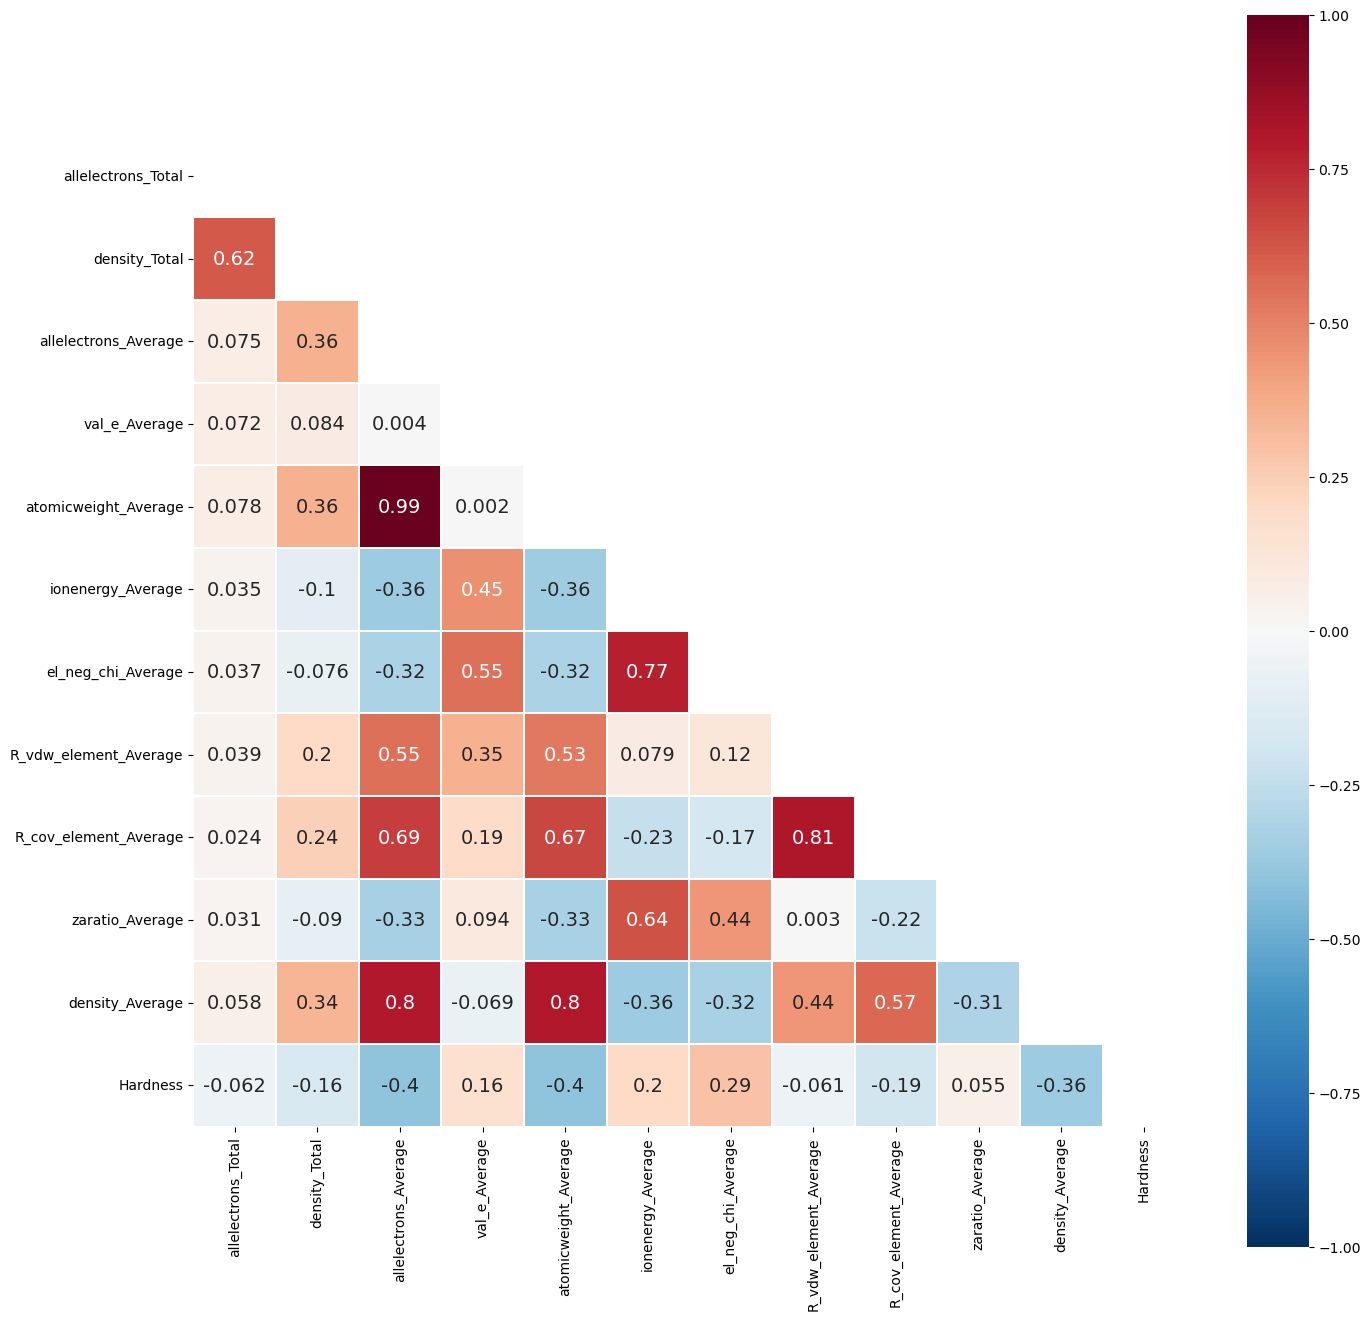

In [14]:
corr_matrix = data.corr().round(3)
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix,linewidths=0.1, vmax=1.0, vmin=-1.0, annot = True, 
            linecolor='white',cmap= colormap, square = True, fmt='.2g', annot_kws={"size": 14}, mask = mask)

**Block description**
- **Histogram / Box plot** - you can notice that most distributions have outliers/large heavy tail of the distribution
- **correlation of features** - There are signs that are highly correlated with each other

## 3. Train model

**Assessment of the quality of models work**
- We have a large number of emissions/heavy tail
- Let’s accept the fact that when cleaning data, we will lose a large amount of data, and it may be extremely necessary for us to take into account emissions

**Problem Solving MedAE** - Median Absolute Error
<br/>**MedAE(y,y') = median(|yi - y'i|,..,|yn - y'n|)**
<br/>**yi'** - is the predicted value
<br/>**yi** - is the ground truth for each observation 

3.1 Let's scale our numerical data

In [82]:
data.columns

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [101]:
from sklearn.preprocessing import StandardScaler
columns_for_scaller = ['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[columns_for_scaller] = scaler.fit_transform(data[columns_for_scaller]) #train
data_test[columns_for_scaller] = scaler.fit_transform(data_test[columns_for_scaller]) #test

3.2 Divide the data into objects and responses

In [17]:
### Divide the data into objects and responses
def X_y(df, target:str):
    X = df.drop([target], axis=1)
    y = df[target]
    return X, y
X_base, y_base = X_y(data, 'Hardness')

3.3 For fun, let’s load 16 different models applicable for linear regression

In [84]:
LR = LinearRegression()
LR_Ridge = Ridge(random_state=42)
LR_Lasso = Lasso(random_state=42)
SGD_Regressor = SGDRegressor(random_state=42, verbose=0)
ARD_Regression = ARDRegression()
Bayesian_Ridge = BayesianRidge()
Decision_Tree = DecisionTreeRegressor(random_state=42)
Random_Forest = RandomForestRegressor(random_state=42, verbose=0)
Gradient_Boosting = GradientBoostingRegressor(random_state=42, verbose=0)
XGB = XGBRegressor(random_state=42, verbosity=0)
LGBM = LGBMRegressor(random_state=42, verbosity=0, force_col_wise=True)
CatBoost = CatBoostRegressor(random_state=42, verbose=0)
SVR_Model = SVR()
KNN = KNeighborsRegressor()
MLP = MLPRegressor(random_state=42, verbose=False)

models = [LR, LR_Ridge, LR_Lasso, SGD_Regressor, ARD_Regression, Bayesian_Ridge, Decision_Tree, Random_Forest, Gradient_Boosting, XGB, LGBM, CatBoost, SVR_Model, KNN, MLP, Gaussian_Process]

3.4 Function for training by folds, and output of the model result and it's std

In [250]:
from sklearn.model_selection import KFold
from sklearn.metrics import median_absolute_error

def train_regressor(regressor, X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold_results = []
    for train_index, valid_index in kf.split(X, y):
        xtrain, xvalid = X.iloc[train_index], X.iloc[valid_index]
        ytrain, yvalid = y[train_index], y[valid_index]
        regressor.fit(xtrain, ytrain)
        y_pred = regressor.predict(xvalid)
        MAE_test = median_absolute_error(yvalid, y_pred)
        fold_results.append(round(MAE_test,3))
    std = np.std(fold_results)
    return np.mean(fold_results), std    

3.5 Function of running several models and saving results

In [251]:
def evaluate_models(models, X, y):
    results = []
    for model in models:
        model_name = type(model).__name__
        mae, std = train_regressor(model, X, y)
        results.append((model_name, mae, std))
        
        print(f'MAE {model_name}: {mae:.3f} ± {std:.3f}')
    
    results.sort(key=lambda x: x[1])
    
    return results

### Loss function: MSE, Metric:MAE

In [227]:
results = evaluate_models(models, X_base, y_base)

MAE LinearRegression: 0.964 ± 0.029
MAE Ridge: 0.964 ± 0.029
MAE Lasso: 1.353 ± 0.014
MAE SGDRegressor: 0.975 ± 0.019
MAE ARDRegression: 0.964 ± 0.029
MAE BayesianRidge: 0.965 ± 0.030
MAE DecisionTreeRegressor: 0.770 ± 0.040
MAE RandomForestRegressor: 0.657 ± 0.023
MAE GradientBoostingRegressor: 0.698 ± 0.015
MAE XGBRegressor: 0.679 ± 0.021
MAE LGBMRegressor: 0.648 ± 0.014
MAE CatBoostRegressor: 0.659 ± 0.016
MAE SVR: 0.617 ± 0.025
MAE KNeighborsRegressor: 0.728 ± 0.016
MAE MLPRegressor: 0.772 ± 0.027
MAE GaussianProcessRegressor: 31.547 ± 2.203


### Loss function: MAE, Metric:MAE
#### Let's take models where it is possible to apply the MAE quality functionality
#### !!! Don't use it on Random Forest or Extra Trees though, those two have bugged MAE and will make your notebook run forever.

In [30]:
SVR_Model_MAE = SVR(kernel='linear')
LGBM_MAE = LGBMRegressor(objective='regression_l1', random_state=42, verbosity=0, force_col_wise=True)
#Random_Forest_MAE = RandomForestRegressor(criterion='absolute_error', random_state=42)
CatBoost_MAE = CatBoostRegressor(loss_function='MAE', random_state=42, verbose=0)
KNN_MAE = KNeighborsRegressor(metric='manhattan')
#Decision_Tree_MAE = DecisionTreeRegressor(criterion='absolute_error', random_state=42)
models_MAE = [SVR_Model_MAE,LGBM_MAE, CatBoost_MAE, KNN_MAE]

results_MAE = evaluate_models(models_MAE, X_base, y_base)


MAE SVR: 0.821 ± 0.009
MAE LGBMRegressor: 0.533 ± 0.020
MAE CatBoostRegressor: 0.542 ± 0.019
MAE KNeighborsRegressor: 0.688 ± 0.020


In [42]:
# Create a results table
df_results = pd.DataFrame({'Model': [], 'Los function: MSE, Metric:MAE': [], 'Los function: MAE, Metric:MAE': []})

for i in range(1, len(results_MAE)+1):
    model_name = results_MAE[i-1][0]
    mae = results_MAE[i-1][1]
   #std = results_scaling[i-1][2]
    df_results = df_results.append({ 'Model': model_name, 'Los function: MAE, Metric:MAE': mae}, ignore_index=True)

for i in range(1, len(models)+1):
    model_name = results[i-1][0]
    mae = results[i-1][1]
    df_results = df_results.append({'Model': model_name, 'Los function: MSE, Metric:MAE': mae}, ignore_index=True)
    
df_results = df_results.groupby('Model').agg({'Los function: MSE, Metric:MAE': 'first', 'Los function: MAE, Metric:MAE': 'first'})
df_results['Los function: MAE, Metric:MAE'] = df_results['Los function: MAE, Metric:MAE'].round(3)


In [43]:
df_results.sort_values(by = ['Los function: MAE, Metric:MAE', 'Los function: MSE, Metric:MAE'])

,"Los function: MSE, Metric:MAE","Los function: MAE, Metric:MAE"
Model,,
LGBMRegressor,0.6484,0.533
CatBoostRegressor,0.6588,0.542
KNeighborsRegressor,0.7280,0.688
SVR,0.6174,0.821
RandomForestRegressor,0.6570,NaN
XGBRegressor,0.6790,NaN
GradientBoostingRegressor,0.6984,NaN
DecisionTreeRegressor,0.7700,NaN
MLPRegressor,0.7716,NaN


**Block description**
- **TOP MODELS** - LGBMRegressor = 0.533 | CatBoostRegressor = 0.542
- **TOP LOSS FUNCTION** - MAE




## 4. Feature engineering

#### 4.2 load date again 

In [155]:
df = pd.read_csv('train.csv', index_col='id')
df_test = pd.read_csv('test.csv', index_col='id')

#### 4.2 Drop columns
</br>Drop the **'allelectrons_Average'**: 
<br/>- correlation with **'atomicweight_Average'** = 0.99, correlation with  **'density_Average'** = 0.80
</br>By analogy: 
</br>- Drop the **'density_Average'**: correlation with **'atomicweight_Average'** = 0.80
</br>- Drop the **'R_vdw_element_Average'**: correlation with **'R_cov_element_Average'** = 0.81

In [156]:
drop_col = ['allelectrons_Average', 'density_Average', 'R_vdw_element_Average']
df = df.drop(columns =drop_col)
df_test = df_test.drop(columns =drop_col)

####  4.3 Let's work with the Artificial_Crystal dataset

- The dataset contains 50 unique minerals (with fixed parameters)
- each parameter corresponds to its special crystal structure
- Let's try to correlate the parameters of our objects with some crystal structure

In [157]:
Artificial_Crystal['Crystal structure'] = Artificial_Crystal['Crystal structure'].fillna('other')

**Let's look at the block raft tabular data (Hardness from structure)**

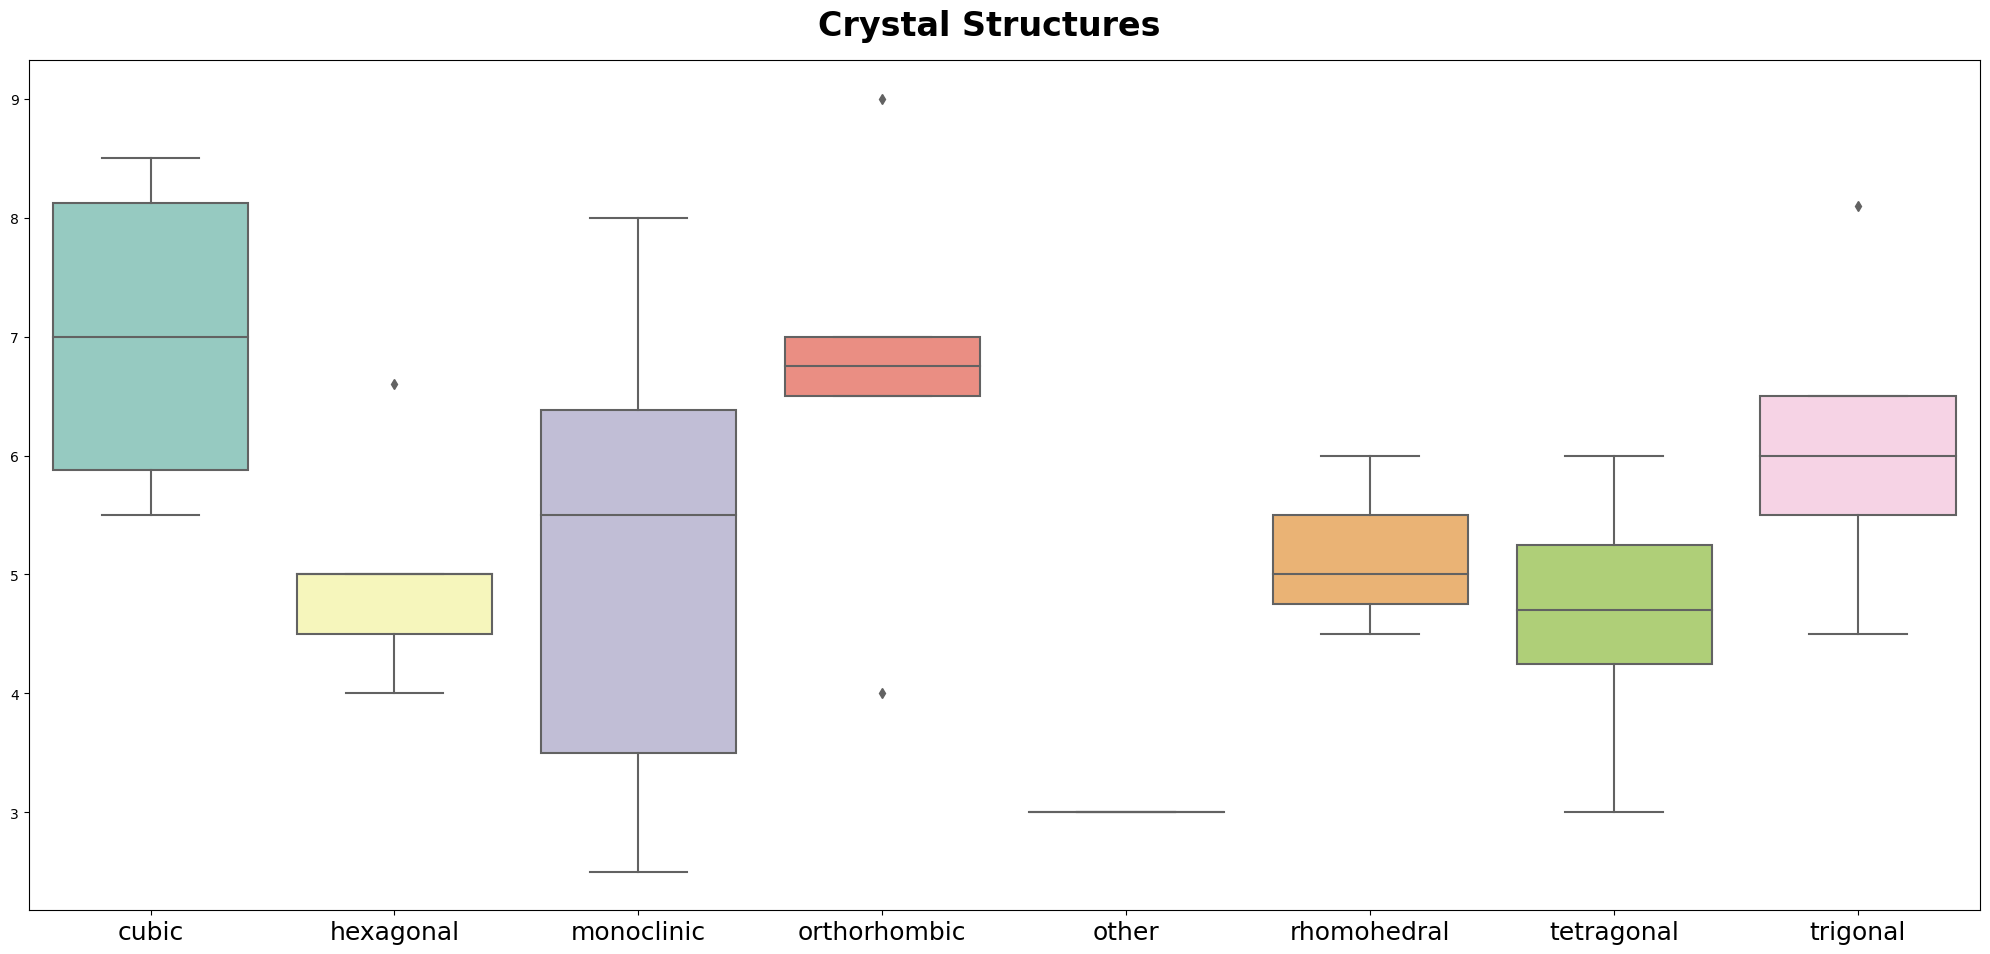

In [158]:
plt.figure(figsize=(20, 10))
sorted_structures = sorted(Artificial_Crystal['Crystal structure'].unique())
sns.boxplot(x='Crystal structure', y='Hardness (Mohs)', data=Artificial_Crystal, palette='Set3', order=sorted_structures)
plt.xticks(rotation=0, fontsize=18)
plt.title('')
plt.xlabel('')
plt.ylabel('')

plt.suptitle(f'Crystal Structures \n', ha='center', fontweight='bold', fontsize=24, y=0.95)
plt.tight_layout()
plt.show()

#### 4.4 Let's do this thing:
- Let’s have a “Crystal_structure” column in our training dataset
- And depending on the combination of our criteria for each object, we classify our objects by “Crystalline_structure”:
- Since our accuracy data may not coincide with other objects from the “Artificial_Crystal” database, you can take method **NearestNeighbors** from sklearns.
- pack it all into a function

In [159]:
columns = [col for col in df.columns if col in Artificial_Crystal.columns]

nn = NearestNeighbors(n_neighbors=1, p=2)
nn.fit(Artificial_Crystal[columns])
distances_df, indices_df = nn.kneighbors(df[columns])
df['CS'] = Artificial_Crystal.iloc[indices_df.flatten()]['Crystal structure'].values

columns_test = [col for col in df_test.columns if col in Artificial_Crystal.columns]
distances_test, indices_test = nn.kneighbors(df_test[columns_test])
df_test['CS'] = Artificial_Crystal.iloc[indices_test.flatten()]['Crystal structure'].values

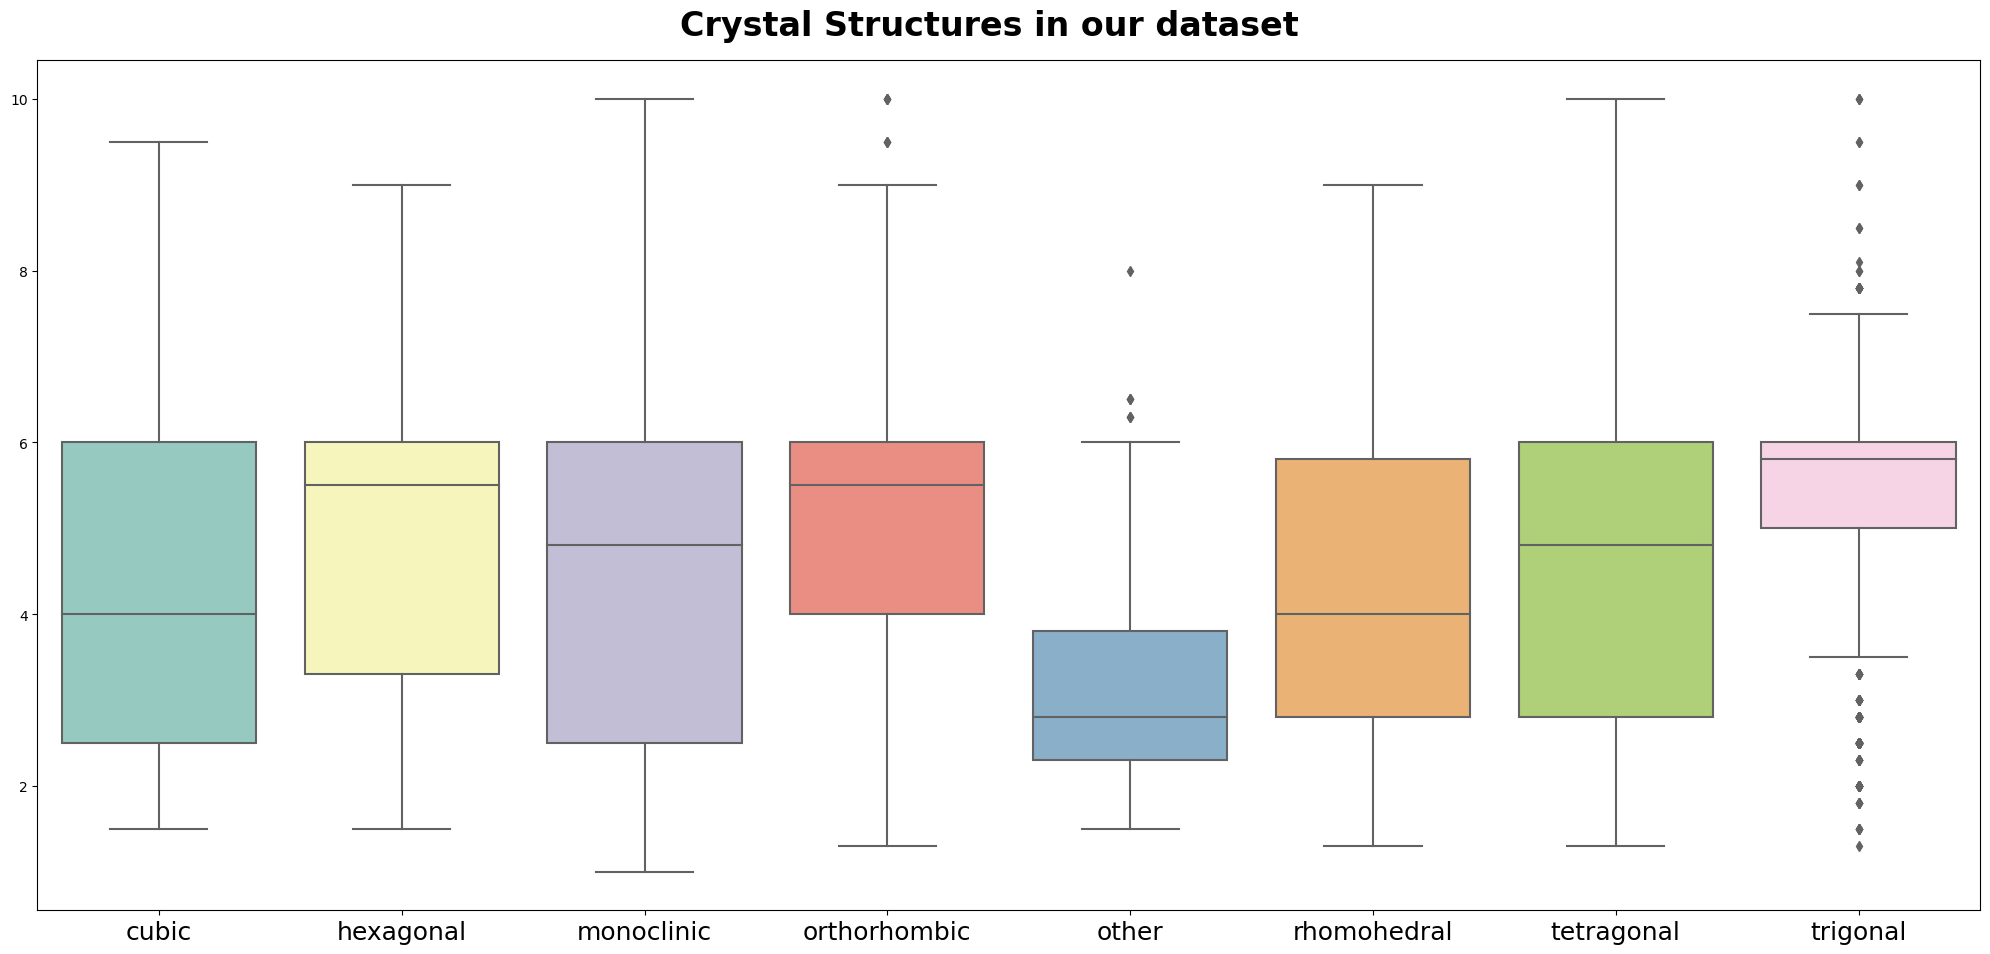

In [160]:
plt.figure(figsize=(20, 10))
sorted_structures = sorted(df['CS'].unique())
sns.boxplot(x='CS', y='Hardness', data=df, palette='Set3', order=sorted_structures)
plt.xticks(rotation=0, fontsize=18)
plt.title('')
plt.xlabel('')
plt.ylabel('')

plt.suptitle(f'Crystal Structures in our dataset \n', ha='center', fontweight='bold', fontsize=24, y=0.95)
plt.tight_layout()
plt.show()

####  4.5 Let's use OneHotEncoder by column Crystal_structure :

In [161]:
#train
one_hot = pd.get_dummies(df['CS'], prefix='CS', drop_first=True)
df = pd.concat((df.drop('CS', axis=1), one_hot), axis=1)
#test
one_hot_test = pd.get_dummies(df_test['CS'], prefix='CS', drop_first=True)
df_test = pd.concat((df_test.drop('CS', axis=1), one_hot_test), axis=1)

In [163]:
columns_for_scaller = ['allelectrons_Total', 'density_Total', 'val_e_Average',
       'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average',
       'R_cov_element_Average', 'zaratio_Average']
scaler = StandardScaler()
df[columns_for_scaller] = scaler.fit_transform(df[columns_for_scaller])
df_test[columns_for_scaller] = scaler.fit_transform(df_test[columns_for_scaller])

**Let's look at the data**

In [167]:
df.head()

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_cov_element_Average,zaratio_Average,Hardness,CS_hexagonal,CS_monoclinic,CS_orthorhombic,CS_other,CS_rhomohedral,CS_tetragonal,CS_trigonal
id,,,,,,,,,,,,,,,,
0,-0.125176,-0.854598,0.366532,-0.649538,0.106370,0.472806,-0.467381,0.043139,6.0,0,1,0,0,0,0,0
1,-0.125176,-0.434060,0.366532,-0.661596,0.782925,0.439960,-0.189615,-0.009986,6.5,0,1,0,0,0,0,0
2,-0.232265,-0.350946,1.524558,-0.144879,0.815215,0.657942,-0.445159,-0.188197,2.5,0,0,0,0,1,0,0
3,-0.125176,-0.356625,0.366532,-0.664885,0.007237,0.120452,-0.045177,-0.064634,6.0,0,1,0,0,0,0,0
4,-0.053783,-0.307620,0.366532,-0.481317,0.629290,0.472806,-0.267389,-0.009717,6.0,0,0,1,0,0,0,0


In [168]:
df_test.head()

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_cov_element_Average,zaratio_Average,CS_hexagonal,CS_monoclinic,CS_orthorhombic,CS_other,CS_rhomohedral,CS_tetragonal,CS_trigonal
id,,,,,,,,,,,,,,,
10407,3.649923,5.617488,1.073252,1.614287,-1.124918,-0.960566,1.396697,-0.489534,0,0,0,0,0,0,1
10408,-0.175670,-0.256153,1.541699,0.041886,0.844734,0.804960,-0.477746,-0.254484,0,0,0,0,0,1,0
10409,-0.050398,-0.370160,0.370582,-0.555583,0.074211,0.111139,0.057809,0.128881,0,0,1,0,0,0,0
10410,-0.127488,-0.299563,0.370582,-0.662850,0.844734,0.681063,-0.879412,0.067746,0,1,0,0,0,0,0
10411,-0.344304,-0.567092,-0.800534,-0.564878,0.260674,-0.474272,-0.314104,-0.256145,0,1,0,0,0,0,0


In [172]:
### Divide the data into objects and responses
X, y = X_y(df, 'Hardness')

## 5. Train  TOP models after FEATURE ENGINEERING 

#### Let's look at the results after FEATURE ENGINEERING 
- deleted columns correlation more than 0.8), 
- using data on the structure of the material from the reference book (data calculated using the nearest neighbors method) and encoded using ONE HOT encoding

In [176]:
results_MAE_with_features = evaluate_models([LGBM_MAE, CatBoost_MAE], X, y)

MAE LGBMRegressor: 0.524 ± 0.014
MAE CatBoostRegressor: 0.542 ± 0.012


**Block description**
- LGBMRegressor showed results,
- CatBoostRegressor did not.
- Let's continue to select Hyper parametrs only for LGBMRegressor


### Let's select hyper-parameters using OPTUNA and use cross-validation inside it

In [180]:
def lgbm(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.09, 0.1),
        'min_child_samples': trial.suggest_int('min_child_samples', 42, 48, step=1),
        'subsample': trial.suggest_float('subsample', 0.1, 1, step=0.1),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000, step=25),
    }
    
    regressor = LGBMRegressor(**params, objective='regression_l1', random_state=42, verbosity=0, force_col_wise=True)

    # Выполнение кросс-валидации
    scores = -cross_val_score(regressor, X, y, cv=10, scoring='neg_median_absolute_error')

    # Возврат отрицательного среднего значения метрики в качестве метрики
    return scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(lgbm, n_trials=15)

lgbm_best_params = study.best_params
lgbm_best_score = study.best_value
print("Best Hyperparameters: ", lgbm_best_params)
print("Best median_absolute_error Score: ", lgbm_best_score)


[I 2023-11-23 11:20:58,859] A new study created in memory with name: no-name-2e72e551-d0e3-4f33-8d31-15288bc69e18
[I 2023-11-23 11:21:15,564] Trial 0 finished with value: 0.5126456109839508 and parameters: {'learning_rate': 0.0994475058441868, 'min_child_samples': 42, 'subsample': 0.7000000000000001, 'n_estimators': 1000}. Best is trial 0 with value: 0.5126456109839508.
[I 2023-11-23 11:21:30,642] Trial 1 finished with value: 0.5146722809958858 and parameters: {'learning_rate': 0.09216713391159384, 'min_child_samples': 43, 'subsample': 0.7000000000000001, 'n_estimators': 975}. Best is trial 0 with value: 0.5126456109839508.
[I 2023-11-23 11:21:44,098] Trial 2 finished with value: 0.5172106546036878 and parameters: {'learning_rate': 0.09879557951587714, 'min_child_samples': 43, 'subsample': 0.4, 'n_estimators': 900}. Best is trial 0 with value: 0.5126456109839508.
[I 2023-11-23 11:21:57,509] Trial 3 finished with value: 0.5180495651332567 and parameters: {'learning_rate': 0.095209629678

Best Hyperparameters:  {'learning_rate': 0.09088659821769807, 'min_child_samples': 42, 'subsample': 0.30000000000000004, 'n_estimators': 725}
Best median_absolute_error Score:  0.5121491152632733


## 5. Fix hyperparameters
- We fix the hyperparameters and compare three LGBMRegressor models (initially the classic MSE loss, with MAE and after selecting the hyperparameters and feature engineering)

In [189]:
lgbm_params = {'learning_rate': 0.09088659821769807, 'min_child_samples': 42, 'subsample': 0.3, 'n_estimators': 725}
lgbm = LGBMRegressor(force_col_wise=True, objective='regression_l1', random_state=42,verbosity=0, **lgbm_params)

In [252]:
results_MAE_Hyper = evaluate_models([lgbm], X, y)

MAE LGBMRegressor: 0.518 ± 0.029


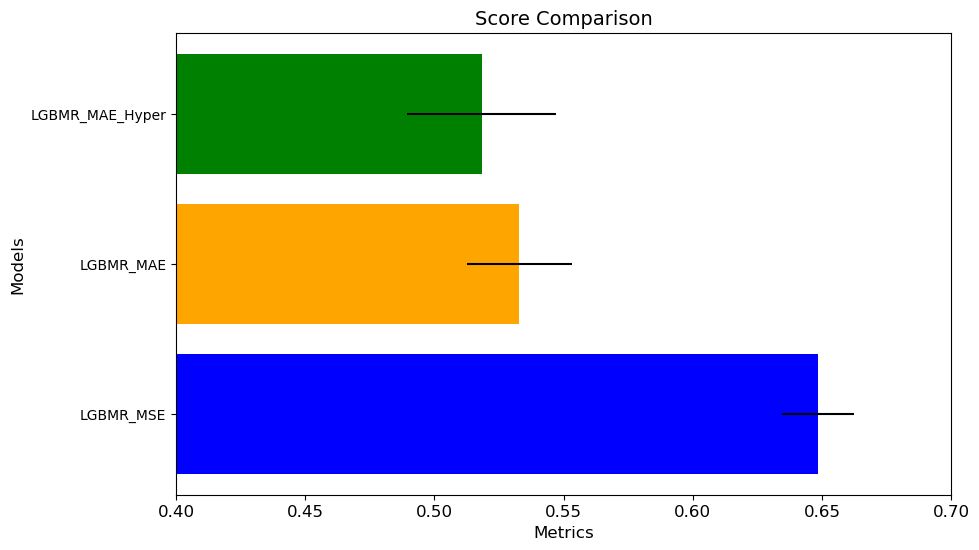

In [253]:
# Данные результатов модели
res = [
    results[1],
    results_MAE[0],
    results_MAE_Hyper[0]
]

# Извлечение метрик и стандартных отклонений
metrics = [res[1] for res in res]
stds = [res[2] for res in res]

# Создание графика с указанием размера
plt.figure(figsize=(10, 6))

# Цвета для каждой гистограммы
colors = ['blue', 'orange', 'green']

# Построение столбцов гистограммы с цветами
bars = plt.barh(['LGBMR_MSE', 'LGBMR_MAE', 'LGBMR_MAE_Hyper'], metrics, xerr=stds, color=colors)

# Ограничение графика по значению на оси x
plt.xlim(0.4, 0.7)

# Настройка осей и меток
plt.xticks(rotation=0, fontsize=12)
plt.title('Score Comparison', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Models', fontsize=12)


# Отображение графика
plt.show()



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

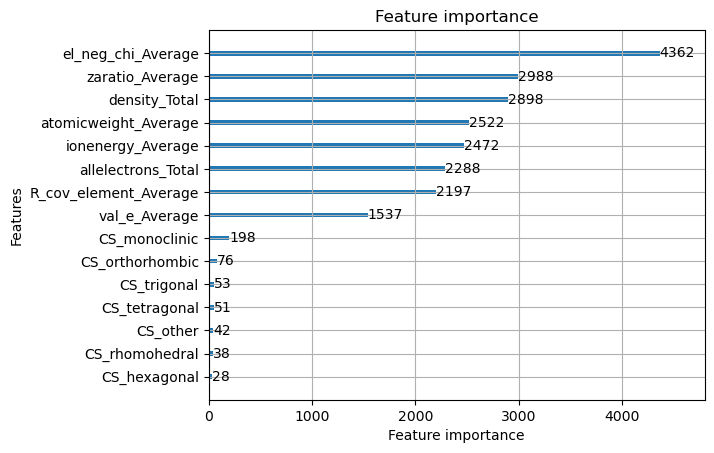

In [254]:
import lightgbm
lightgbm.plot_importance(lgbm)

In [255]:
submission = pd.read_csv('sample_submission.csv')

In [256]:
submission['Hardness'] = lgbm.predict(df_test)
submission.head()

,id,Hardness
0,10407,2.531581
1,10408,2.881906
2,10409,5.762368
3,10410,4.828539
4,10411,5.573739


In [257]:
submission.to_csv("submission.csv", index=False)

### as a result

1. We trained several classic regression models and understood which ones work better
2. Trained (where possible) models with MAE quality functionality (LGBMRegressor, CatBoostRegressor) - showed good quality with this functionality
3. Experimented with the data. We removed the correlated columns, added data to each object according to its structure (we selected a similar structure from the reference book using the nearest neighbors method). The data was not cleaned, since MAE handles outliers well. CatBoostRegressor showed no results. We leave only - LGBMRegressor
4. Selected hyper-parameters through OPTUNA. The result of the OPTUNA cross-validation on the test is **0.512**, based on the functions used earlier in training (train_regressorб evaluate_models : MAE LGBMRegressor result: **0.518**